# S Based Data Viz.
In this notebook, we try to visualize how the intensity values change for different values of maternal and fetal saturation + Hb concentration

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from inverse_modelling_tfo.data import generate_data_loaders, equidistance_detector_normalization, constant_detector_count_normalization
from inverse_modelling_tfo.data.intensity_interpolation import get_interpolate_fit_params_custom, interpolate_exp
from inverse_modelling_tfo.data.interpolation_function_zoo import *

In [23]:
# data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/s_based_intensity.pkl')
# data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/s_based_intensity_low_conc.pkl')
# data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/inverse_modelling_tfo/tools/s_based_intensity_low_conc.pkl')
data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/s_based_intensity_low_conc2.pkl')
# data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/s_based_intensity_low_conc_test.pkl')
equidistance_detector_normalization(data)

INTERPOLATE_DATA = True
# INTERPOLATE_DATA = False

# Interpolate intensity to remove noise
if INTERPOLATE_DATA:
    data = interpolate_exp(data, weights=[1, 0.8])
    data['Intensity'] = data['Interpolated Intensity']

data['Intensity'] = np.log10(data['Intensity'])        # Far values wayy to small to affect anything. Take log
data.head()

,SDD,Intensity,Wave Int,Uterus Thickness,Maternal Wall Thickness,Maternal Hb Concentration,Maternal Saturation,Fetal Hb Concentration,Fetal Saturation,Interpolated Intensity
0,10,-4.965775,1.0,5.0,6.0,12.0,0.9,0.11,0.1,1.081995e-05
1,14,-7.347777,1.0,5.0,6.0,12.0,0.9,0.11,0.1,4.489755e-08
2,19,-9.090567,1.0,5.0,6.0,12.0,0.9,0.11,0.1,8.117696e-10
3,23,-9.968481,1.0,5.0,6.0,12.0,0.9,0.11,0.1,1.075274e-10
4,28,-10.706361,1.0,5.0,6.0,12.0,0.9,0.11,0.1,1.966251e-11


In [24]:
data.groupby('Wave Int')["Maternal Wall Thickness"].value_counts()

Wave Int  Maternal Wall Thickness
1.0       2.0                        12500
          4.0                        12500
          6.0                        12500
          8.0                        12500
          10.0                       12500
          12.0                       12500
          14.0                       12500
          16.0                       12500
2.0       2.0                        12500
          4.0                        12500
          6.0                        12500
          8.0                        12500
          10.0                       12500
          12.0                       12500
          14.0                       12500
          16.0                       12500
Name: Maternal Wall Thickness, dtype: int64

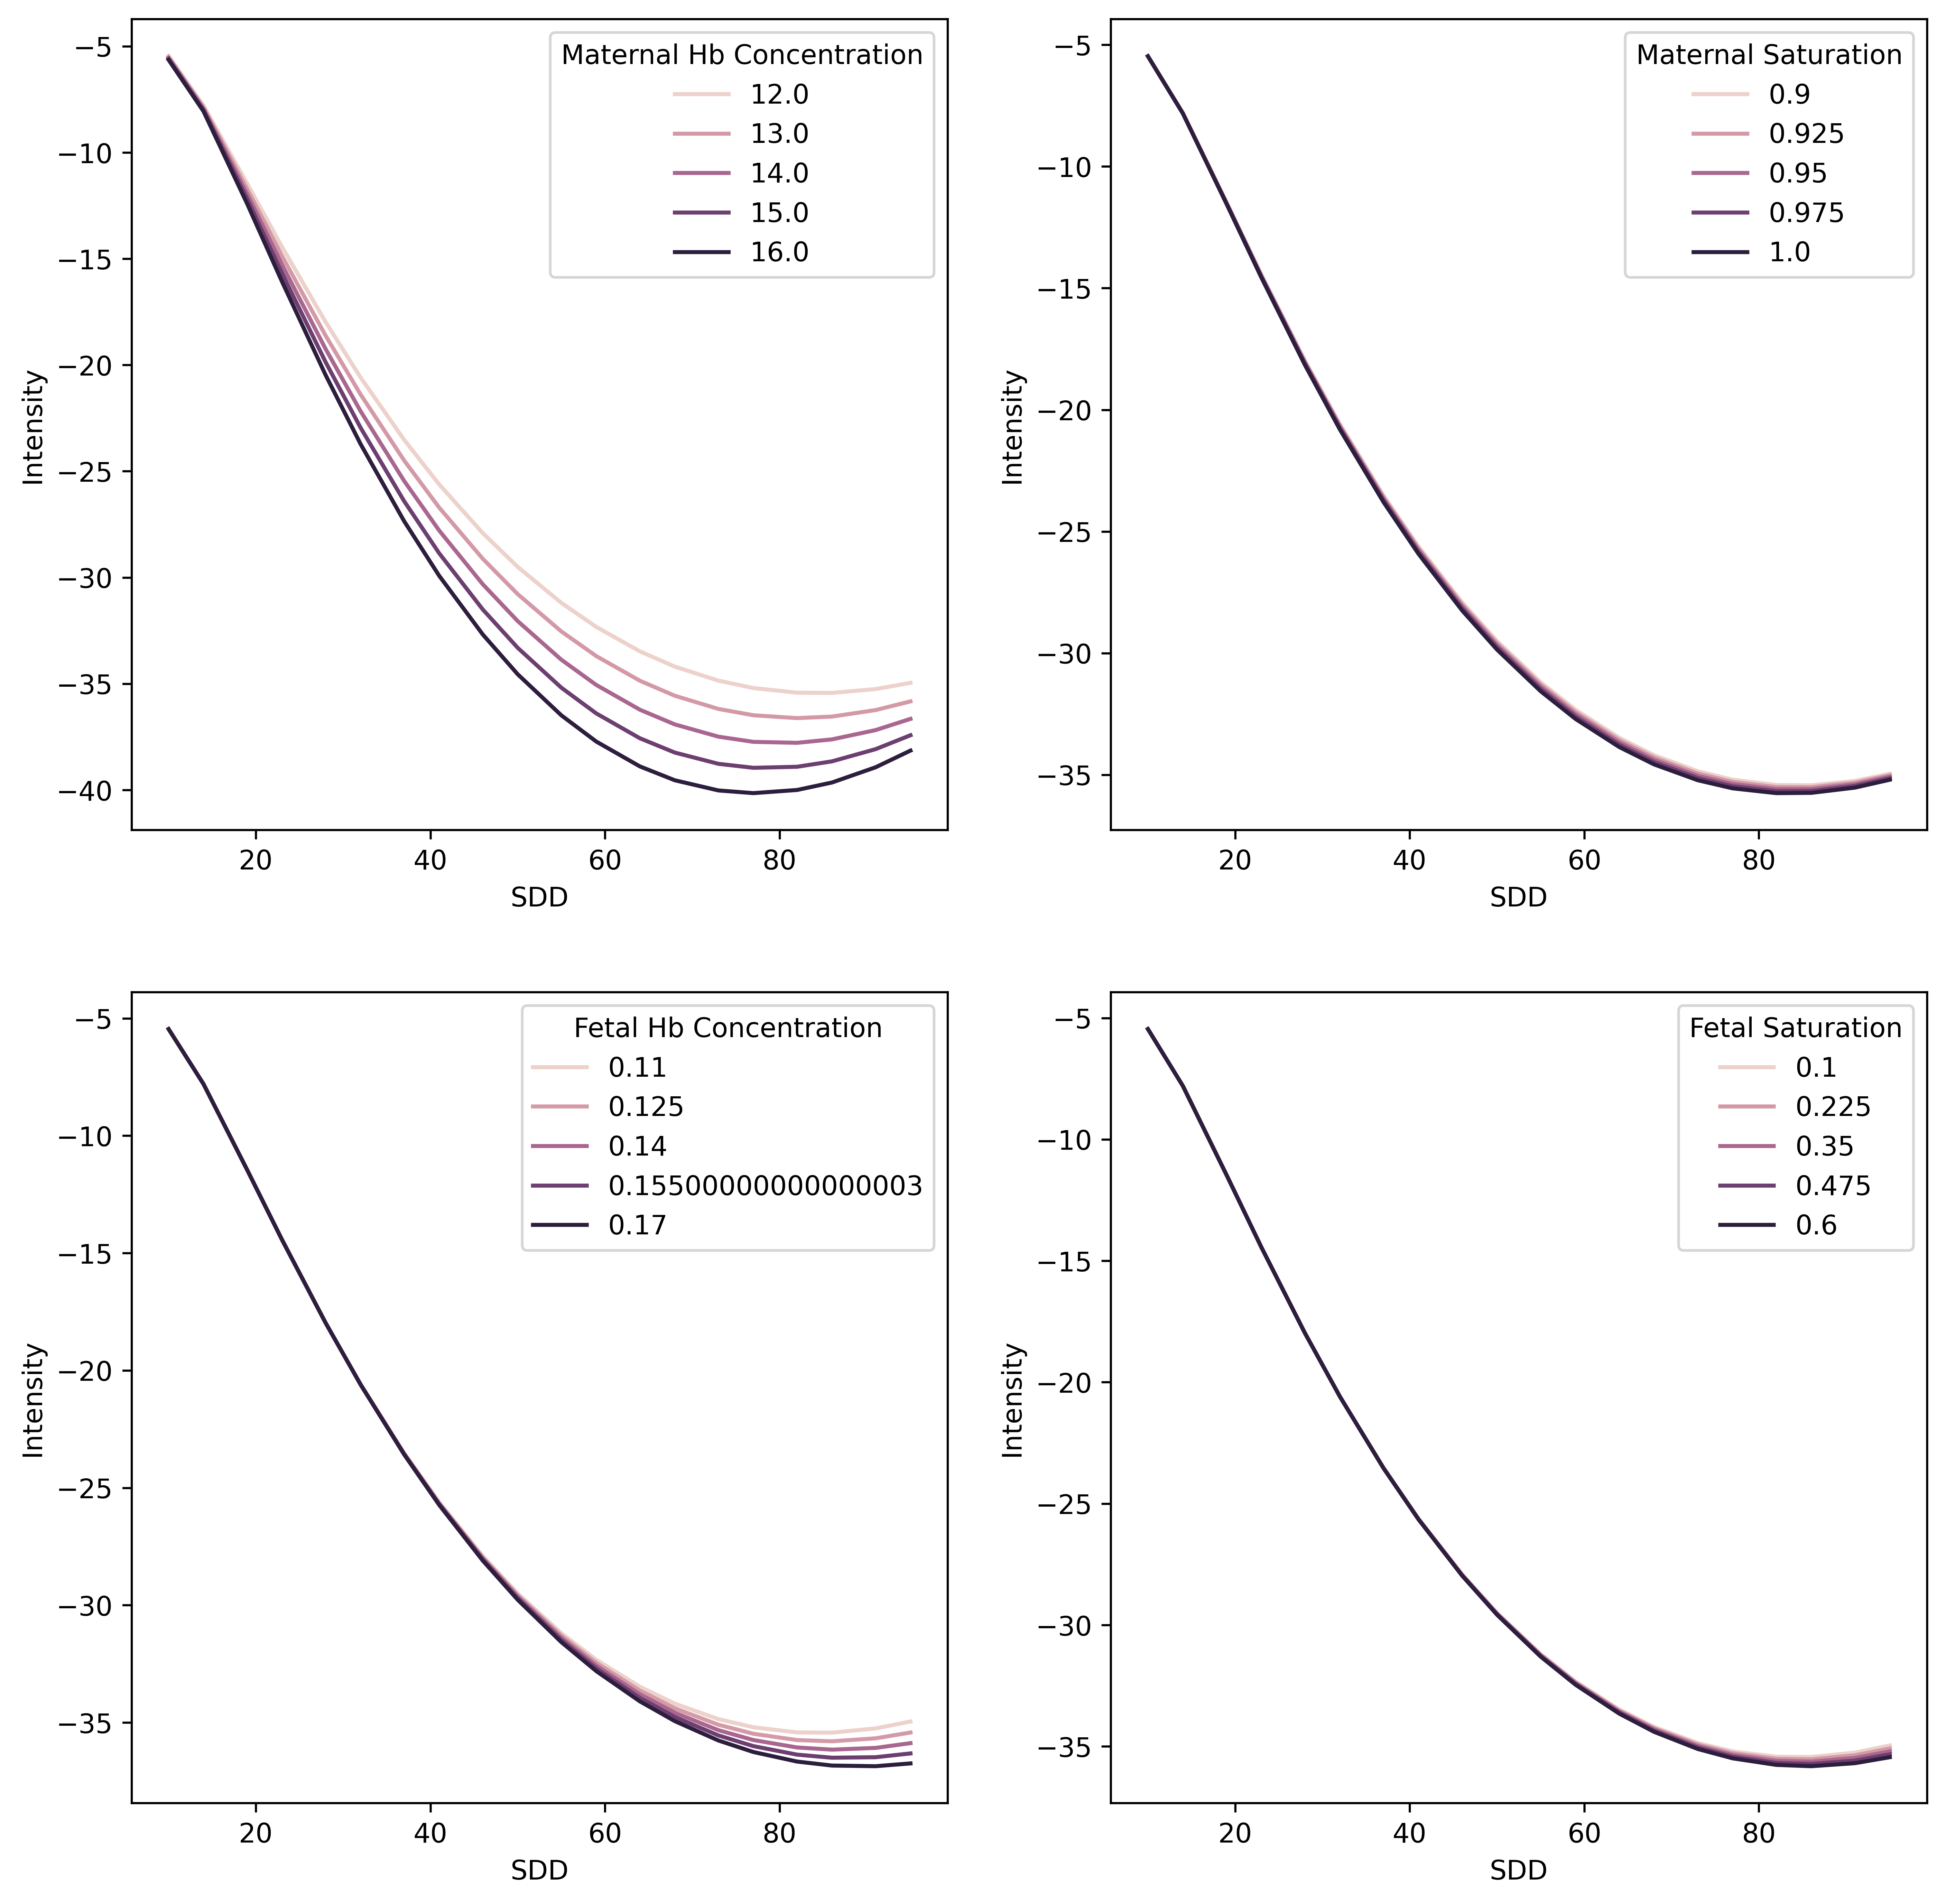

In [25]:
THICKNESS = 16.0
WAVE_INT = 2
MATERNAL_CONCENTRATION = 12
FETAL_CONCENTRATION = 0.11
MATERNAL_SATURATION = 0.9
FETAL_SATURATION = 0.1


data = data[data["Wave Int"] == WAVE_INT]

filtered_data1 = data[(data['Maternal Saturation']==MATERNAL_SATURATION) & (data["Fetal Saturation"]==FETAL_SATURATION) & (data['Fetal Hb Concentration']==FETAL_CONCENTRATION) & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data2 = data[(data['Maternal Hb Concentration']==MATERNAL_CONCENTRATION) & (data["Fetal Saturation"]==FETAL_SATURATION) & (data['Fetal Hb Concentration']==FETAL_CONCENTRATION)  & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data3 = data[(data['Maternal Hb Concentration']==MATERNAL_CONCENTRATION) & (data["Fetal Saturation"]==FETAL_SATURATION) & (data['Maternal Saturation']==MATERNAL_SATURATION)  & (data['Maternal Wall Thickness']==THICKNESS)]
filtered_data4 = data[(data['Maternal Hb Concentration']==MATERNAL_CONCENTRATION) & (data["Fetal Hb Concentration"]==FETAL_CONCENTRATION) & (data['Maternal Saturation']==MATERNAL_SATURATION) & (data['Maternal Wall Thickness']==THICKNESS)]

plt.figure(figsize=(12, 12), dpi=600)
plt.subplot(2, 2, 1)
sns.lineplot(data=filtered_data1, x='SDD', y='Intensity', hue='Maternal Hb Concentration')
plt.subplot(2, 2, 2)
sns.lineplot(data=filtered_data2, x='SDD', y='Intensity', hue='Maternal Saturation')
plt.subplot(2, 2, 3)
sns.lineplot(data=filtered_data3, x='SDD', y='Intensity', hue='Fetal Hb Concentration')
plt.subplot(2, 2, 4)
sns.lineplot(data=filtered_data4, x='SDD', y='Intensity', hue='Fetal Saturation')

plt.show()

## SNR Data

In [26]:
from pathlib  import Path
SNR_FILEPATH = Path('../data/snr/snr1.pkl')

snr_data = pd.read_pickle(SNR_FILEPATH)
snr_data.head()

,SDD,SNR,Fetal SNR,Wave Int,Uterus Thickness,Maternal Wall Thickness
0,10,34763416,355392,2.0,5.0,26.0
1,14,14554830,486602,2.0,5.0,26.0
2,19,7361883,583740,2.0,5.0,26.0
3,23,4602644,648503,2.0,5.0,26.0
4,28,3146096,687988,2.0,5.0,26.0


In [27]:
snr_data.describe()

,SDD,SNR,Fetal SNR,Wave Int,Uterus Thickness,Maternal Wall Thickness
count,760.000000,7.600000e+02,7.600000e+02,760.000000,760.0,760.000000
mean,52.500000,3.720334e+06,8.796507e+05,1.500000,5.0,20.000000
std,25.944859,7.628531e+06,1.321314e+06,0.500329,0.0,10.961665
min,10.000000,7.592600e+04,7.592600e+04,1.000000,5.0,2.000000
25%,31.000000,3.280840e+05,2.636055e+05,1.000000,5.0,10.000000
50%,52.500000,8.619170e+05,4.401505e+05,1.500000,5.0,20.000000
75%,74.000000,3.006638e+06,8.993098e+05,2.000000,5.0,30.000000
max,95.000000,3.484443e+07,1.209440e+07,2.000000,5.0,38.000000
